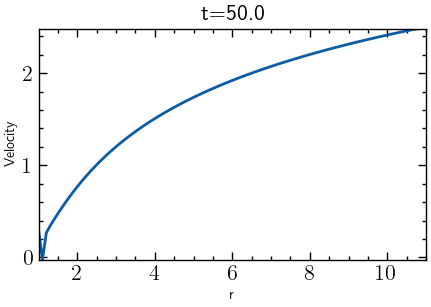

In [168]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scienceplots

plt.style.use(['science', 'notebook'])
plt.rcParams.update({"text.usetex" : True})

for n in [50000]:  # number of iterations
    nr = 101  # r resolution

    r_min = 1.
    r_max = 11.

    eta = 0.1
    K = 1.
    GM = 5.

    t = 0.
    
    dr = (r_max - r_min) / (nr - 1)
    dt = dr * 0.01

    rho = np.ones(nr) * 0.01
    v = np.zeros(nr)

    drho_dt = np.zeros(nr)
    dv_dt = np.zeros(nr)

    t = 0.


    #initial conditions
    rho[0] = 1.
    v[0] = 0.3
    

    r = np.linspace(r_min, r_max, nr)


    for k in range(0, n):

        for i in range(1, nr-1):
            
            if v[i] >= 0:
                drho_dt[i] = - ( 1 / r[i]**2 ) * ( 2 * r[i] * rho[i] * v[i] + r[i]**2 * v[i] * ( ( rho[i] - rho[i - 1] ) / dr ) \
                             + r[i]**2 * rho[i] * ( v[i + 1] - v[i - 1] ) / ( 2 * dr )  )
        
                dv_dt[i] = - v[i] * ( ( v[i] - v[i - 1] ) / dr ) - K / rho[i] * ( ( rho[i + 1] - rho[i - 1] ) / ( 2 * dr ) ) \
                           - GM / r[i]**2 + eta * (2 / r[i] * (v[i] - v[i - 1]) / (dr) + ( v[i + 1] - 2 * v[i] + v[i - 1] ) / ( dr**2 ))

            elif v[i] < 0:
                drho_dt[i] = - ( 1 / r[i]**2 ) * ( 2 * r[i] * rho[i] * v[i] + r[i]**2 * v[i] * ( ( rho[i + 1] - rho[i] ) / dr ) \
                        + r[i]**2 * rho[i] * ( v[i + 1] - v[i - 1] ) / ( 2 * dr )  )
            
                dv_dt[i] = - v[i] * ( ( v[i + 1] - v[i] ) / dr ) - K / rho[i] * ( ( rho[i + 1] - rho[i - 1] ) / ( 2 * dr ) ) \
                           - GM / r[i]**2 + eta * (2 / r[i] * (v[i + 1] - v[i]) / (dr) + ( v[i + 1] - 2 * v[i] + v[i - 1] ) / ( dr**2 ))     
    
        for i in range(1, nr-1):

            rho[i] = rho[i] + drho_dt[i] * dt
            v[i] = v[i] + dv_dt[i] * dt
            
        t = t + dt

        v[nr - 1] = v[nr - 2]
        rho[nr - 1] = rho[nr - 2]
        
        
    # Here we plot the results

    fig = plt.figure(figsize=(5, 3))
    ax1 = fig.add_subplot(1,1,1, xlim=[r_min, r_max])
    plt.plot(r, v)
    

    plt.xlabel('r')
    plt.ylabel('Velocity')
    plt.title(f"t={round(t,1)}")
    plt.ylim(min(v),max(v))
    

    # fig = plt.figure(figsize=(5, 3))
    # ax1 = fig.add_subplot(1,1,1, xlim=[r_min, r_max])
    # plt.plot(r, rho)
    # plt.xlabel('r')
    # plt.ylabel('Density')
    # plt.title(f"t={t}")
   
    plt.show()





In [165]:
(0.3-0.192)/0.192

0.5624999999999999

In [ ]:
for i in range(1, 20):

    print(f'i = {i},{- v[i] * ( ( v[i] - v[i - 1] ) / dr ) - K / rho[i] * ( ( rho[i + 1] - rho[i - 1] ) / ( 2 * dr ) ) - GM / r[i]**2 + eta * (2 / r[i] * (v[i] - v[i - 1]) / (dr) + ( v[i + 1] - 2 * v[i] + v[i - 1] ) / ( dr**2 ))}')

i = 1,-0.0007460890484116689
i = 2,-0.0003973694841712394
i = 3,-0.00017413990339726348
i = 4,-0.0001505827308004165
i = 5,-0.000153137768238637
i = 6,-0.00016032198108151263
i = 7,-0.0001682438657952673
i = 8,-0.00017602474065727541
i = 9,-0.00018346287408897016
i = 10,-0.00019053506686872446
i = 11,-0.00019726740172143487
i = 12,-0.0002036972931256549
i = 13,-0.00020986174047005896
i = 14,-0.0002157939016897946
i = 15,-0.00022152245278996355
i = 16,-0.00022707186867635537
i = 17,-0.00023246296432630903
i = 18,-0.0002377134592568414
i = 19,-0.00024283848675778208
